In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import sys
import os
from sklearn.decomposition import PCA

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils import load_config, seed_everything

In [2]:
seed_everything(42)
config = load_config("../configs/config.yaml")

In [3]:
# Set Seaborn style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Customize Matplotlib parameters for consistency
plt.rcParams.update(config['plot_params'])

### Read and look into files

In [8]:
data_mat = pd.read_csv(config['paths']['data_mat_path'])
data_mat.head(5)

,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-242,FT-243,FT-244,FT-245,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251
0,20241106-297-Blank1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,20241106-297-Blank2,0.0,0.000000,0.0,5.770641,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.534493,0.0,0.0,0.0
2,20241106-297-Blank3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.469501,0.0,0.0,0.0
3,20241106-297-Blank4,0.0,5.497865,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,20241106-297-Blank5,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [9]:
feat_meta = pd.read_csv(config['paths']['feat_meta_path'])
feat_meta.head(5)

,feature,mz,mz max,mz min,mz std,rt,rt end,rt max,rt min,rt start,rt std
0,FT-000,359.108768,359.130591,359.090122,0.010955,543.846374,561.270879,546.697803,539.941156,528.714227,1.683901
1,FT-001,357.109546,357.130018,357.091871,0.010668,543.839157,563.021530,546.948017,540.038924,528.530311,1.662290
2,FT-002,889.649931,889.702216,889.601547,0.025552,609.099742,627.717251,611.746501,606.426553,596.789046,1.324647
3,FT-003,355.111928,355.132772,355.093653,0.010508,543.995269,566.951285,547.164503,540.681882,526.943213,1.609071
4,FT-004,888.645365,888.696941,888.600202,0.026161,609.255652,632.996442,612.008732,606.778809,595.461688,1.254684


In [10]:
sample_meta = pd.read_csv(config['paths']['sample_meta_path'])
sample_meta.head(5)

,sample,class,id,order,batch
0,20241106-297-Blank1,B,20241106-297-Blank1,1,1
1,20241106-297-Blank2,B,20241106-297-Blank2,2,1
2,20241106-297-Blank3,B,20241106-297-Blank3,3,1
3,20241106-297-Blank4,B,20241106-297-Blank4,102,1
4,20241106-297-Blank5,B,20241106-297-Blank5,103,1


In [11]:
exog_stand = pd.read_csv(config['paths']['exog_stan_path'])
exog_stand

,compound_id,mz,Retention_time
0,GU4,886.40,610
1,GU5,1048.45,753
2,GU14,1253.96,1500
3,GU15,1334.99,1551


### Some basic analysis

In [136]:
# Check missing values in data_matrix
data_mat.isnull().sum().sum()


np.int64(0)

In [146]:
# Identify samples with zero or near-zero variance
ft_columns = [col for col in data_mat.columns if col.startswith('FT')]
pd.DataFrame({'sample':data_mat['sample'].values,
               'variance':data_mat[ft_columns].var(axis=1)}).sort_values('variance')

,sample,variance
5,20241106-297-Blank6,1.975773e-01
4,20241106-297-Blank5,2.098533e-01
3,20241106-297-Blank4,3.982067e-01
1,20241106-297-Blank2,5.910245e-01
0,20241106-297-Blank1,5.930987e-01
...,...,...
23,20241106-297-Dunn-20,4.664519e+07
32,20241106-297-Dunn-4,5.101739e+07
24,20241106-297-Dunn-21,5.196536e+07
69,20241106-297-LMU-13,5.279905e+07


<Axes: xlabel='PCA1', ylabel='PCA2'>

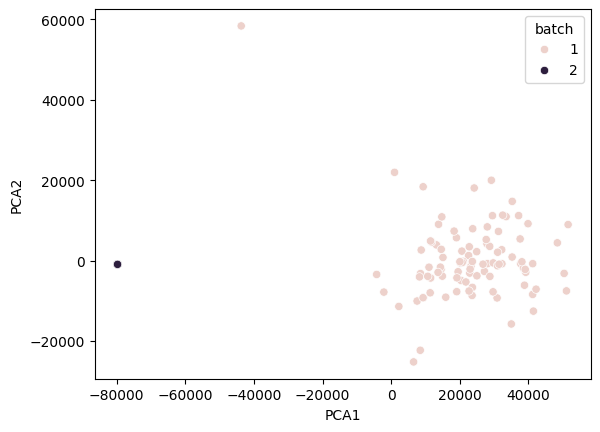

In [152]:
# check batch effect
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_mat.iloc[:, 1:])
sample_meta['PCA1'] = pca_results[:, 0]
sample_meta['PCA2'] = pca_results[:, 1]

# Plot PCA
sns.scatterplot(data=sample_meta, x='PCA1', y='PCA2', hue='batch')


<Axes: xlabel='PCA1', ylabel='PCA2'>

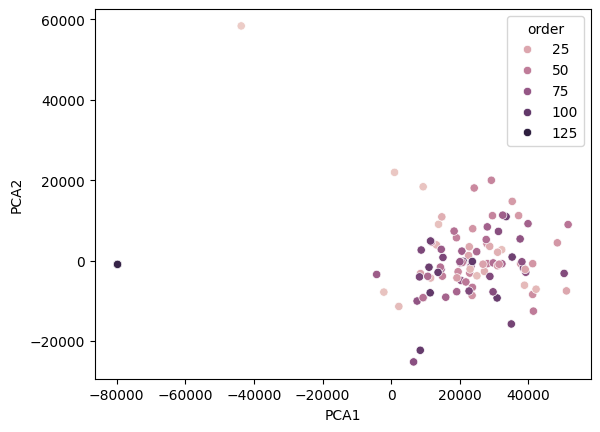

In [153]:
# check order of experiment effect
sns.scatterplot(data=sample_meta, x='PCA1', y='PCA2', hue='order')

<Axes: xlabel='PCA1', ylabel='PCA2'>

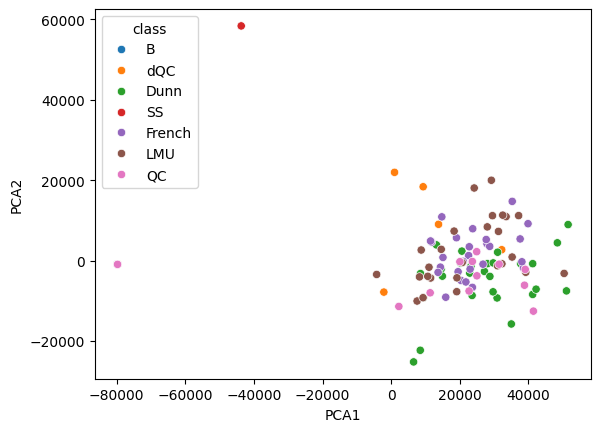

In [154]:
# check classes effect
sns.scatterplot(data=sample_meta, x='PCA1', y='PCA2', hue='class')

<Axes: xlabel='rt', ylabel='mz'>

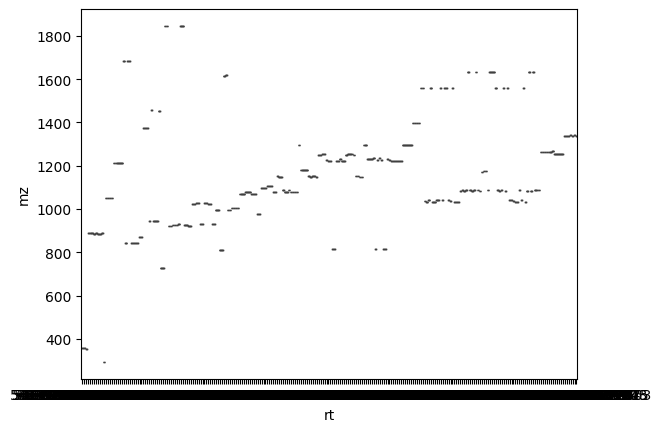

In [ ]:
# Plot mz vs rt
sns.boxplot(data=feat_meta, x='rt', y='mz')

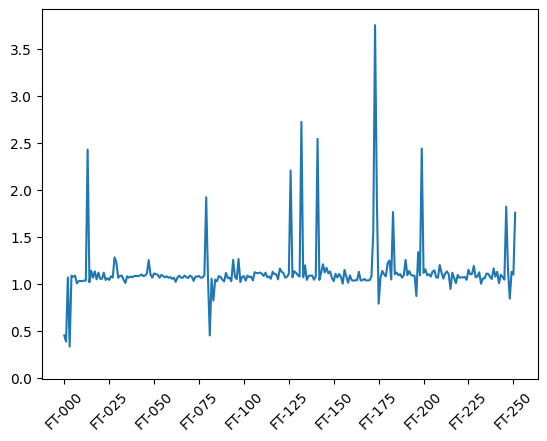

In [175]:
# Calculate RSD for QC samples
qc_samples = sample_meta[sample_meta['class'].str.contains('QC')]
qc_data = data_mat.loc[data_mat['sample'].isin(qc_samples['sample']), ft_columns]
rsd = qc_data.std(axis=0) / qc_data.mean(axis=0)

rsd.plot(kind='line')
plt.xticks(ticks=range(0, len(rsd), 25), labels=[f'FT-{i:03}' for i in range(0, len(rsd), 25)], rotation=45)
plt.ylim(-.01, )
plt.show()

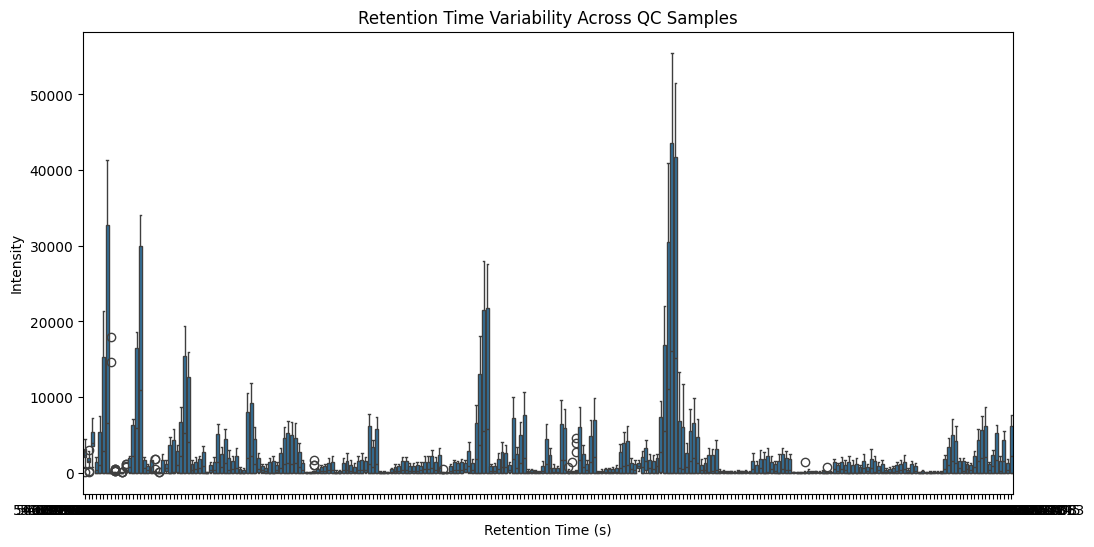

In [181]:
qc_samples = sample_meta[sample_meta['class'].str.contains('QC')]
qc_data = data_mat[data_mat['sample'].isin(qc_samples['sample'])]

# Melt QC data for visualization
qc_long = qc_data.melt(id_vars='sample', var_name='feature', value_name='intensity')

# Add rt and mz from feature_metadata
qc_long = qc_long.merge(feat_meta[['feature', 'rt', 'mz']], left_on='feature', right_on='feature')

# Plot retention time variability across QC samples
plt.figure(figsize=(12, 6))
sns.boxplot(data=qc_long, x='rt', y='intensity')
plt.title('Retention Time Variability Across QC Samples')
plt.xlabel('Retention Time (s)')
plt.ylabel('Intensity')
plt.show()

In [176]:
# Validate known standards
ss_samples = sample_meta[sample_meta['class'] == 'SS']
ss_data = data_mat[data_mat['sample'].isin(ss_samples['sample'])]
ss_data

,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-242,FT-243,FT-244,FT-245,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251
38,20241106-297-Experimental_Blank,1687.701707,2360.443792,2634.198422,4142.561088,9085.299744,49640.208086,25283.725772,2457.991493,8080.007801,...,0.0,0.0,0.0,0.0,86.064078,2047.135847,0.0,0.0,0.0,2.670024
112,20241113-300-Experimental_Blank,2678.271129,3905.931537,0.000000,6039.383279,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


### 1. How many features have been detected, how is the distribution across mz and retention time, and across classes?

In [6]:
print(f'Number of features: {data_mat.shape[1]-1}')
print(f'Number of samples: {data_mat.shape[0]}')

Number of features: 252
Number of samples: 124


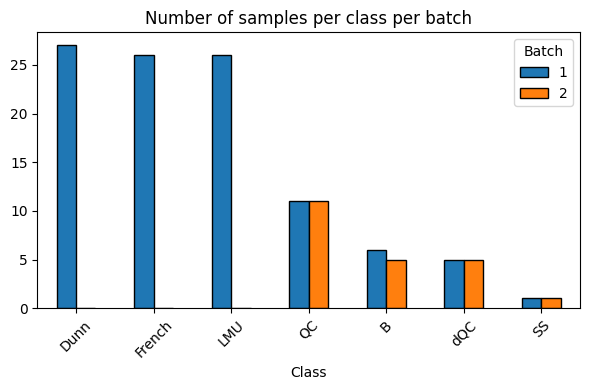

In [7]:
# Group and pivot the data
class_batch_counts = sample_meta.groupby(['class', 'batch']).size().unstack(fill_value=0)

# Sort by total count across batches
class_batch_counts['Total'] = class_batch_counts.sum(axis=1)
class_batch_counts = class_batch_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot grouped bar plot
class_batch_counts.plot(kind='bar', figsize=(6, 4), edgecolor='black')
plt.title('Number of samples per class per batch')
plt.xlabel('Class')
plt.legend(title='Batch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


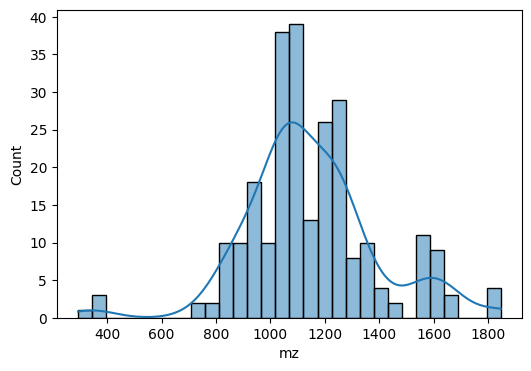

In [8]:
# mz distribution
plt.figure(figsize=(6, 4))
sns.histplot(feat_meta['mz'], kde=True, bins=30)
plt.xlabel('mz')
plt.show()

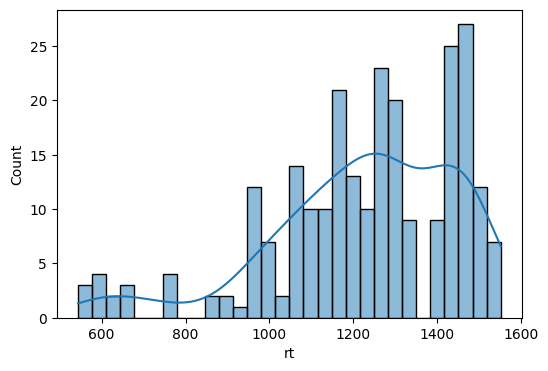

In [ ]:
# rt distribution
plt.figure(figsize=(6, 4))
sns.histplot(feat_meta['rt'], kde=True, bins=30)
plt.xlabel('rt')
plt.show()

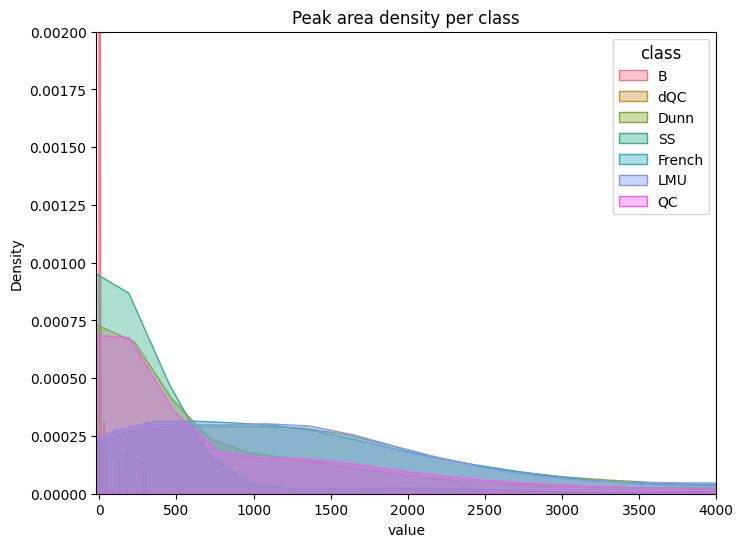

In [18]:
# Peak area density per class
data_mat_with_class = data_mat.merge(sample_meta[['sample', 'class']], how='left')

# Melt numeric features into long 
numeric_features = data_mat_with_class.select_dtypes(include='number')
melted_df = numeric_features.copy()
melted_df['class'] = data_mat_with_class['class']
melted_df = melted_df.melt(id_vars='class', var_name='feature', value_name='value')


# Color palette
palette = sns.color_palette('husl', len(melted_df['class'].unique()))

# Overley plots
plt.figure(figsize=(8, 6))

for color, category in zip(palette, melted_df['class'].unique()):
    subset = melted_df[melted_df['class'] == category]
    sns.kdeplot(
        data=subset,
        x='value',
        label=str(category), 
        fill=True,
        alpha=0.4,
        bw_adjust=0.4,
        color=color
    )


plt.ylim(0, 0.002)
plt.xlim(-20, 4000)
plt.title('Peak area density per class')
plt.legend(title='class', loc='upper right', fontsize='medium', title_fontsize='large')
plt.show()

### 2. How is the contamination in the experiment?

In [123]:
# extract Blank samples
data_mat_blank = data_mat.merge(sample_meta[['sample', 'class', 'batch']], how='left')
data_mat_blank = data_mat_blank[data_mat_blank['class'] == 'B']

# separate batches
data_mat_blank_batch1 = data_mat_blank[(data_mat_blank['class'] == 'B') & ((data_mat_blank['batch'] == 1))]
data_mat_blank_batch2 = data_mat_blank[(data_mat_blank['class'] == 'B') & ((data_mat_blank['batch'] == 2))]


data_mat_blank_batch1.shape, data_mat_blank_batch2.shape

((6, 255), (5, 255))

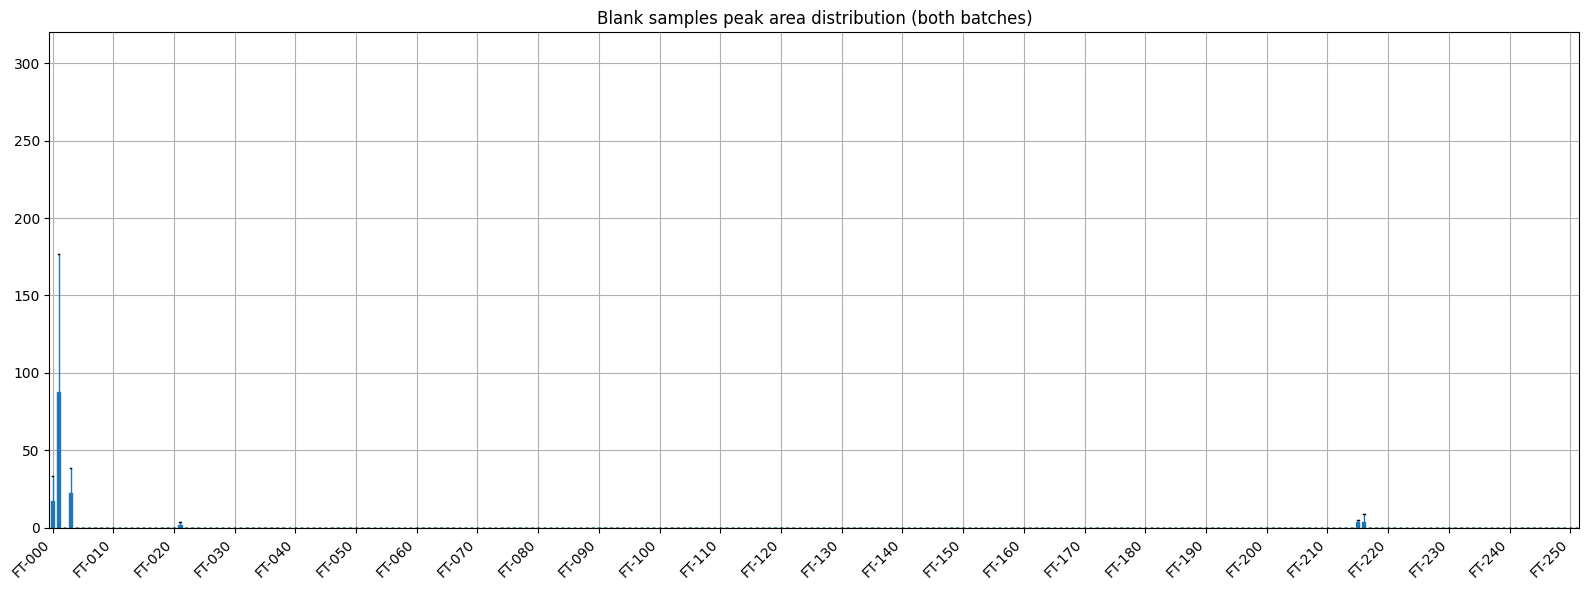

In [135]:
fig, ax = plt.subplots(figsize=(16, 6))  

# Boxplot for all features
data_mat_blank[ft_columns].boxplot(ax=ax, vert=True, patch_artist=True, showfliers=False)

ax.set_xticks(range(1, 253, 10))
ax.set_xticklabels([f"FT-{i:03}" for i in range(0, 252, 10)], rotation=45, ha='right')
ax.set_title('Blank samples peak area distribution (both batches)')
plt.ylim(0, 320)
plt.tight_layout()
plt.show()

In [ ]:
data_mat.isna()

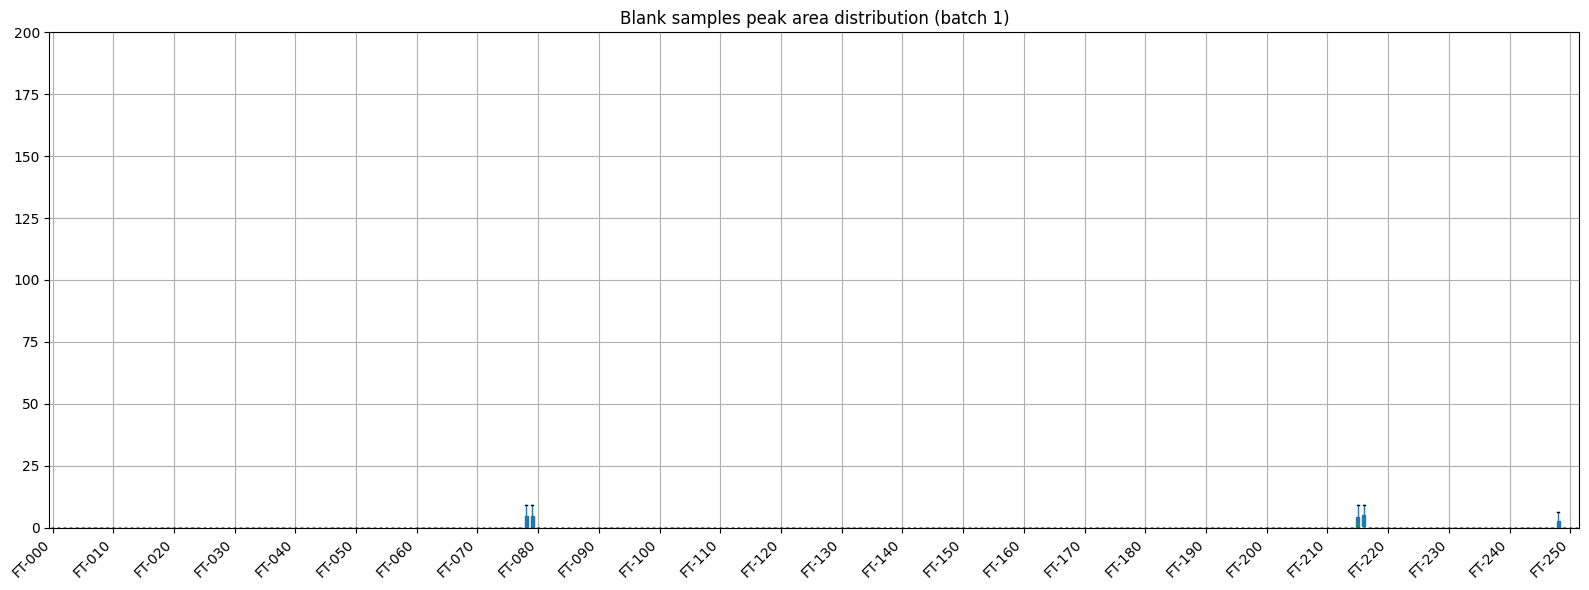

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))  

# Boxplot for all features
data_mat_blank_batch1[ft_columns].boxplot(ax=ax, vert=True, patch_artist=True, showfliers=False)

ax.set_xticks(range(1, 253, 10))
ax.set_xticklabels([f"FT-{i:03}" for i in range(0, 252, 10)], rotation=45, ha='right')
ax.set_title('Blank samples peak area distribution (batch 1)')
plt.ylim(0, 320)
plt.tight_layout()
plt.show()

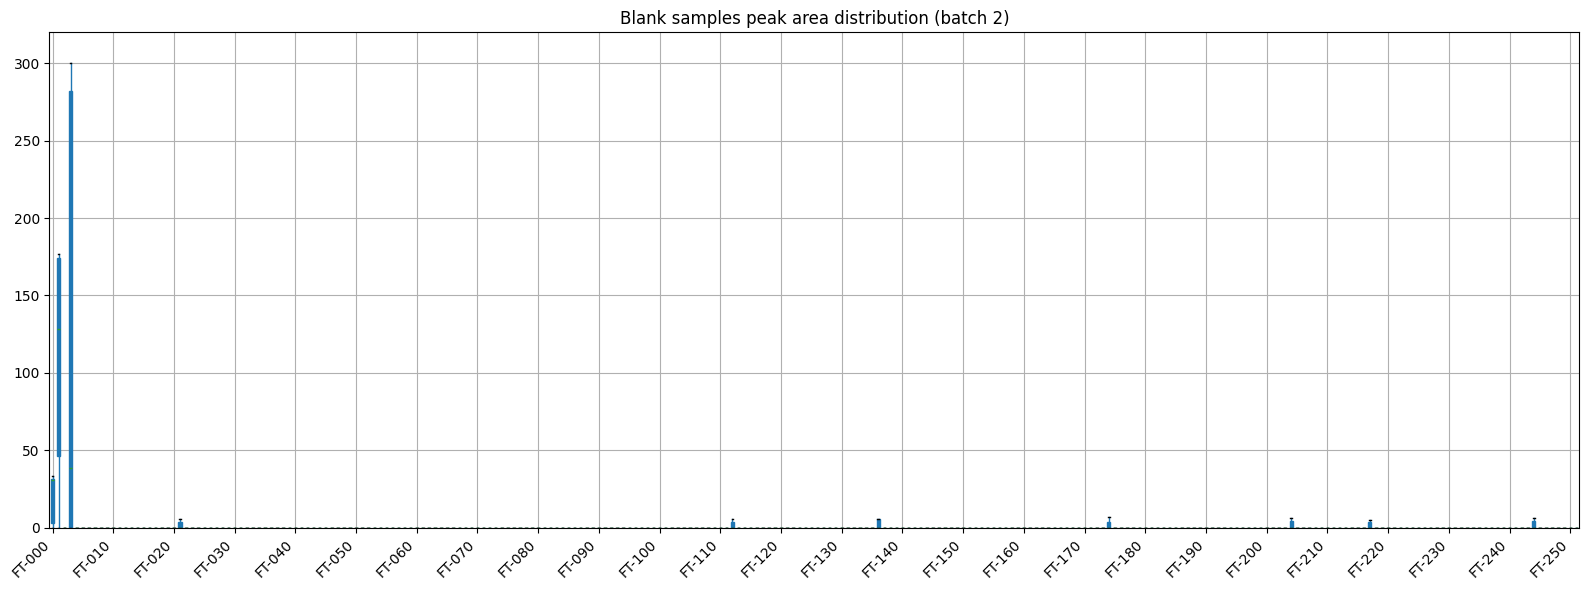

In [134]:
fig, ax = plt.subplots(figsize=(16, 6))  

# Boxplot for all features
data_mat_blank_batch2[ft_columns].boxplot(ax=ax, vert=True, patch_artist=True, showfliers=False)

ax.set_xticks(range(1, 253, 10))
ax.set_xticklabels([f"FT-{i:03}" for i in range(0, 252, 10)], rotation=45, ha='right')
ax.set_title('Blank samples peak area distribution (batch 2)')
plt.ylim(0, 320)
plt.tight_layout()
plt.show()

In [187]:
# Identify Blank samples from acquisition_list
blank_samples = sample_meta[sample_meta['class'].str.contains('B')]['sample']

# Subset Blank data from data_matrix
blank_data = data_mat[data_mat['sample'].isin(blank_samples)]

# Calculate mean intensity per feature across Blank samples
blank_means = blank_data.iloc[:, 1:].mean(axis=0)

# Calculate mean intensity per feature across non-Blank samples
non_blank_samples = sample_meta[~sample_meta['class'].str.contains('B')]['sample']
non_blank_data = data_mat[data_mat['sample'].isin(non_blank_samples)]
non_blank_means = non_blank_data.iloc[:, 1:].mean(axis=0)

# Create a DataFrame to compare Blank and Non-Blank intensities
contamination_df = pd.DataFrame({
    'Feature': blank_data.columns[1:],
    'Blank_Mean_Intensity': blank_means.values,
    'Non_Blank_Mean_Intensity': non_blank_means.values
})

# Calculate a contamination ratio (Blank/Non-Blank mean intensity)
contamination_df['Contamination_Ratio'] = contamination_df['Blank_Mean_Intensity'] / (contamination_df['Non_Blank_Mean_Intensity'] + 1e-6)

# Sort by highest contamination ratio
contamination_df = contamination_df.sort_values(by='Contamination_Ratio', ascending=False)

contamination_df


,Feature,Blank_Mean_Intensity,Non_Blank_Mean_Intensity,Contamination_Ratio
215,FT-215,1.910710,30.440705,0.062768
174,FT-174,0.967837,39.946146,0.024229
79,FT-079,1.391524,65.930322,0.021106
1,FT-001,48.332744,2333.691264,0.020711
216,FT-216,1.946361,101.224907,0.019228
...,...,...,...,...
246,FT-246,0.000000,288.994533,0.000000
247,FT-247,0.000000,1105.046399,0.000000
249,FT-249,0.000000,56.726303,0.000000
250,FT-250,0.000000,801.451981,0.000000


### 3. Are the standards detected consistently across the experiment?

In [195]:
# Match exogenous standards to features based on m/z and retention time (rt)
# Allow a small tolerance for matching (e.g., ±0.1 for m/z and ±10s for rt)
mz_tolerance = 0.5
rt_tolerance = 10

# Initialize a list to store matched features
matched_standards = []

for index, standard in exog_stand.iterrows():
    matched = feat_meta[
        (feat_meta['mz'].between(standard['mz'] - mz_tolerance, standard['mz'] + mz_tolerance)) &
        (feat_meta['rt'].between(standard['Retention_time'] - rt_tolerance, standard['Retention_time'] + rt_tolerance))
    ]
    if not matched.empty:
        for _, row in matched.iterrows():
            matched_standards.append({
                'compound_id': standard['compound_id'],
                'expected_mz': standard['mz'],
                'expected_rt': standard['Retention_time'],
                'feature': row['feature'],
                'observed_mz': row['mz'],
                'observed_rt': row['rt']
            })

# Create a DataFrame of matched standards
matched_standards_df = pd.DataFrame(matched_standards)

# Merge with data_matrix to extract intensities across samples
if not matched_standards_df.empty:
    standard_features = matched_standards_df['feature'].unique()
    standards_data = data_mat[['sample'] + list(standard_features)]
    
    # Melt data for visualization
    standards_long = standards_data.melt(id_vars='sample', var_name='feature', value_name='intensity')
    standards_long = standards_long.merge(matched_standards_df[['feature', 'compound_id']], on='feature')
    print("Standards Matched in Feature Data:\n")
    print(matched_standards_df)

else:
    matched_standards_df = pd.DataFrame(columns=['compound_id', 'expected_mz', 'expected_rt', 'feature', 'observed_mz', 'observed_rt'])
    print("No Standards Matched in Feature Data")


Standards Matched in Feature Data:

  compound_id  expected_mz  expected_rt feature  observed_mz  observed_rt
0         GU4       886.40          610  FT-005   886.632460   609.461289
1         GU5      1048.45          753  FT-010  1048.724800   753.824614
2        GU14      1253.96         1500  FT-162  1254.277029  1499.404825
3        GU15      1334.99         1551  FT-169  1335.323637  1551.257112


### 4. How is the distribution of intensities across the classes? Are there any trends with respect to classes, batches, run order?

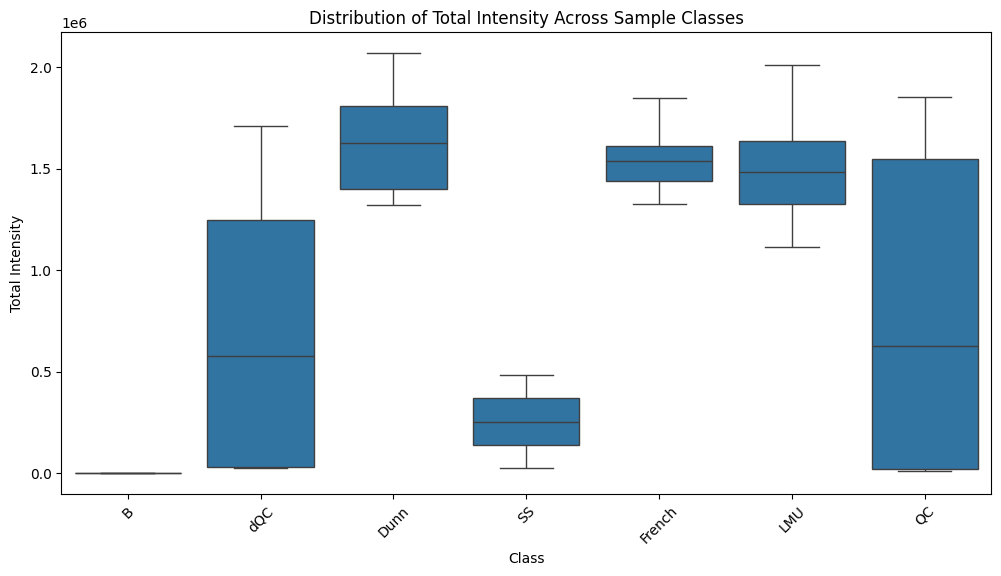

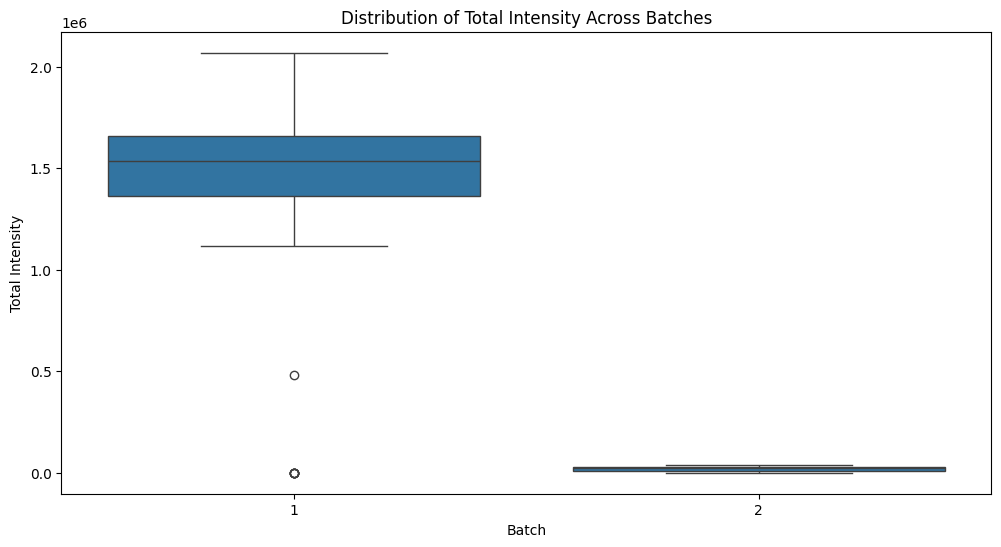

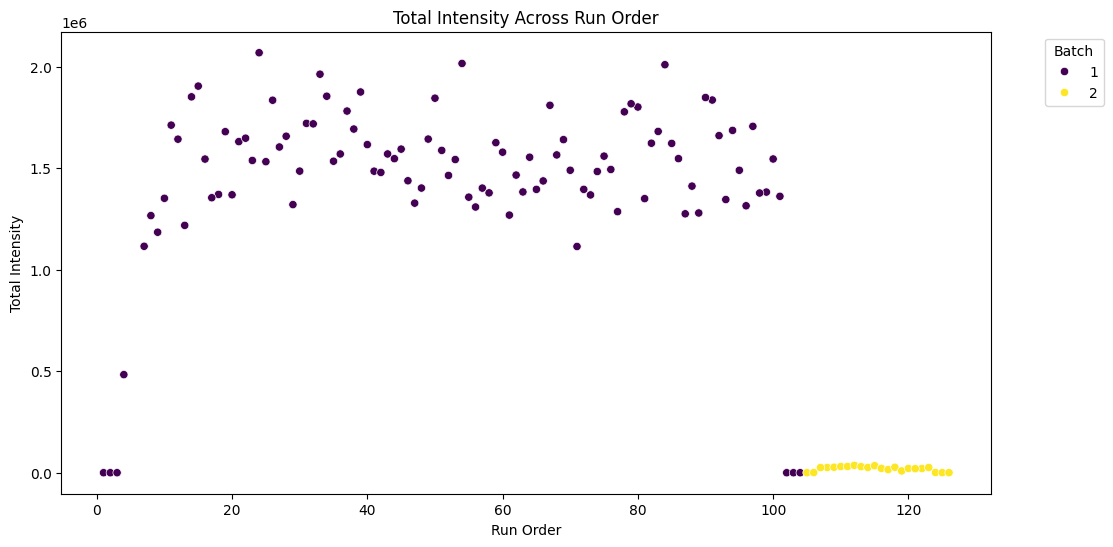

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total intensity per sample
data_mat['total_intensity'] = data_mat.iloc[:, 1:].sum(axis=1)

# Merge total intensity with acquisition_list metadata
intensity_metadata = data_mat[['sample', 'total_intensity']].merge(sample_meta, on='sample')

# Plot 1: Intensity Distribution Across Classes
plt.figure(figsize=(12, 6))
sns.boxplot(data=intensity_metadata, x='class', y='total_intensity')
plt.title('Distribution of Total Intensity Across Sample Classes')
plt.xlabel('Class')
plt.ylabel('Total Intensity')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Intensity Trends Across Batches
plt.figure(figsize=(12, 6))
sns.boxplot(data=intensity_metadata, x='batch', y='total_intensity')
plt.title('Distribution of Total Intensity Across Batches')
plt.xlabel('Batch')
plt.ylabel('Total Intensity')
plt.show()

# Plot 3: Intensity Trends Across Run Order
plt.figure(figsize=(12, 6))
sns.scatterplot(data=intensity_metadata, x='order', y='total_intensity', hue='batch', palette='viridis')
plt.title('Total Intensity Across Run Order')
plt.xlabel('Run Order')
plt.ylabel('Total Intensity')
plt.legend(title='Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 5. What differences are there between sample classes and/or QCs? Is it consistent across batches?

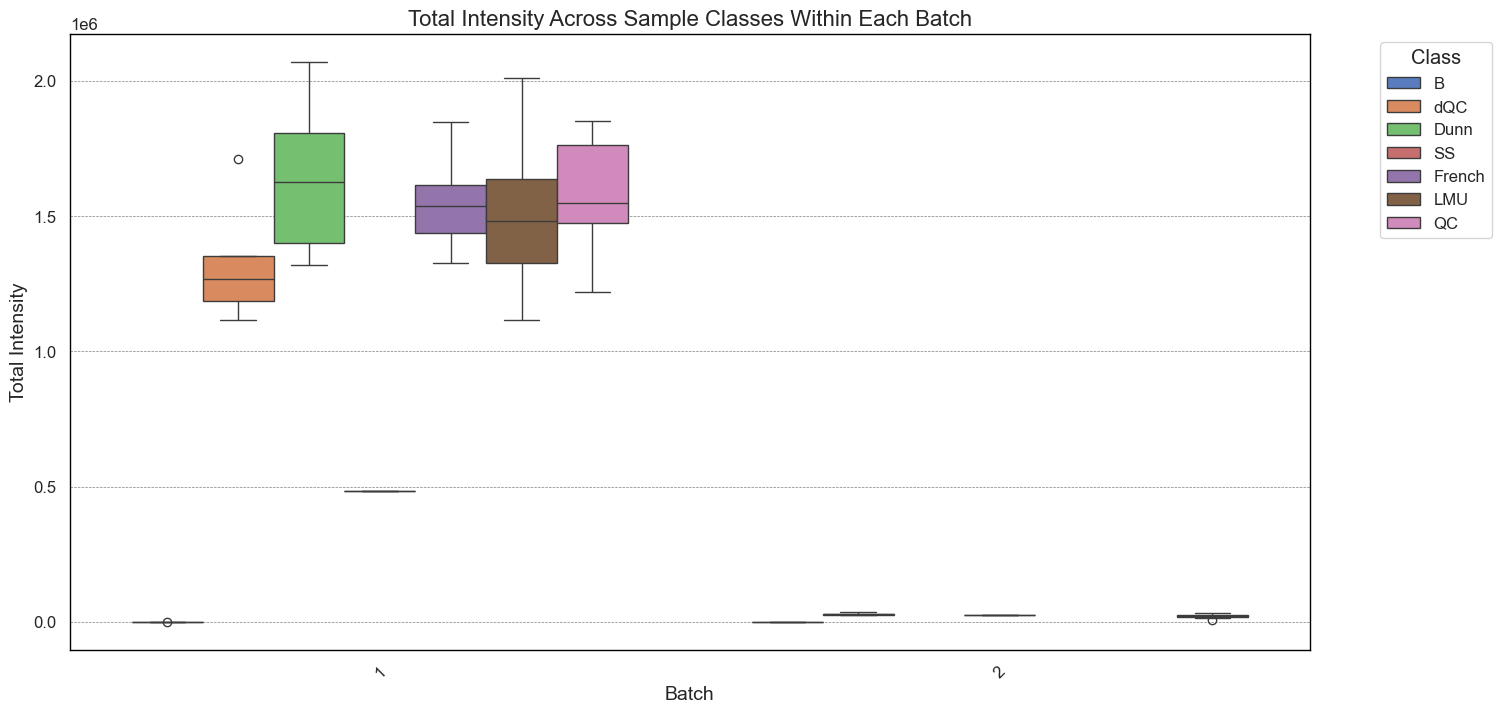

In [205]:
# Plot Intensity Distribution Across Classes Within Each Batch
plt.figure(figsize=(16, 8))
sns.boxplot(data=intensity_metadata, x='batch', y='total_intensity', hue='class')
plt.title('Total Intensity Across Sample Classes Within Each Batch')
plt.xlabel('Batch')
plt.ylabel('Total Intensity')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### CV and Dratio

# Identify QC and biological samples from acquisition_list
qc_samples = sample_meta[sample_meta['class'].str.contains('QC')]['sample']
bio_samples = sample_meta[sample_meta['class'].isin(['Dunn', 'French', 'LMU'])]['sample']

# Subset QC and biological data from data_matrix
qc_data = data_mat[data_mat['sample'].isin(qc_samples)].iloc[:, 1:-1]
bio_data = data_mat[data_mat['sample'].isin(bio_samples)].iloc[:, 1:-1]

# Calculate CV for each feature in QC and biological samples
qc_cv = qc_data.std(axis=0) / qc_data.mean(axis=0)
bio_cv = bio_data.std(axis=0) / bio_data.mean(axis=0)

# Calculate D-Ratio for each feature
d_ratio = qc_data.std(axis=0) / (bio_data.std(axis=0) + 1e-6)  # Avoid division by zero

# Combine results into a summary DataFrame
variability_metrics = pd.DataFrame({
    'Feature': qc_data.columns,
    'QC_CV': qc_cv.values,
    'Bio_CV': bio_cv.values,
    'D_Ratio': d_ratio.values
})

# Sort by D-Ratio for clarity
variability_metrics = variability_metrics.sort_values(by='D_Ratio', ascending=False)
